In [25]:
import numpy as np #Libreria para realizar calculos matematicos avanzados
import pandas as pd #Libreria que contiene funciones para el analisis de datos
import matplotlib.pyplot as plt #Libreria para crear graficos de buena calidad
%matplotlib inline

import seaborn as sns

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Esta linea nos ayuda a desplegar las graficas en el archivo/notebook
%matplotlib inline

In [26]:
Titanic = pd.read_csv('Titanic-Dataset.csv', engine = 'python')

In [27]:
#Obtenemos la estructura del dataset (Cantidad de registros, columnas y el tipo de dato)
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Sex', ylabel='Survived'>

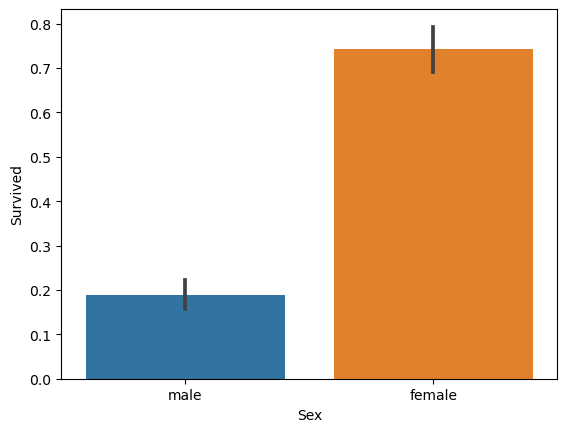

In [29]:
#Grafico de barras Sex vs Survived
sns.barplot(data = Titanic,x='Sex',y='Survived')

C:\Users\wolfx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wolfx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


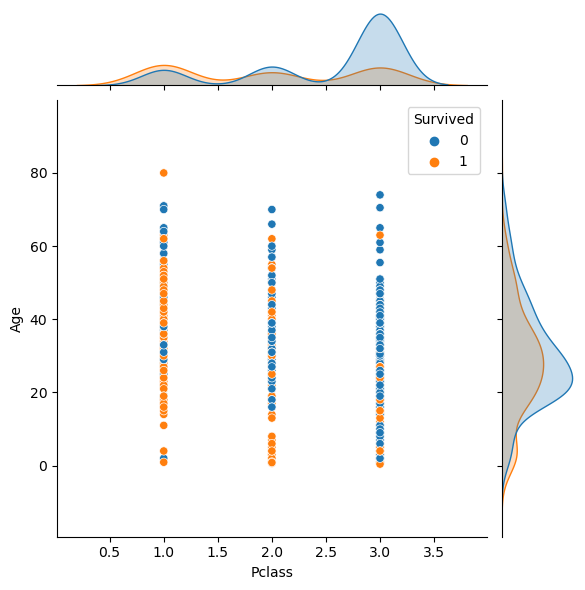

In [30]:
#Generamos un grafico de dispersion para analizar los valores atipicos del dataset
sns.jointplot(x='Pclass',y='Age',data = Titanic, hue ='Survived')

In [31]:
#Reemplazamos los datos que son de tipo objeto (Male, Female) por 0 y 1
Titanic['Sex'].replace({'male':0,'female':1},inplace=True)
Titanic['Sex'].unique()

array([0, 1], dtype=int64)

In [32]:
#Cambiamos el tipo de dato de la columna Gender de entero a float
Titanic['Sex'].astype(float).dtypes

dtype('float64')

In [33]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [34]:
Titanic.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [40]:
Datos = Titanic.iloc[:, [5]].values
Datos

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [  nan],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [  nan],
       [31.  ],
       [  nan],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [  nan],
       [19.  ],
       [  nan],
       [  nan],
       [40.  ],
       [  nan],
       [  nan],
       [66.  ],
       [28.  ],
       [42.  ],
       [  nan],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [  nan],
       [ 3.  ],
       [19.  ],
       [  nan],
       [  nan],
       [  nan],
       [  nan],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [  nan],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [44]:
Titanic['Age'].fillna(0, inplace = True)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
X = Titanic[['Pclass','Sex','Survived']]
y = Titanic['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
pred = model.predict(X_test)
pred

array([16.79091811, 27.69770359, 19.40549737, 24.27476003, 15.98255381,
       32.56696625, 15.98255381, 19.40549737, 15.98255381, 32.56696625,
       35.98990981, 19.40549737, 18.59713308, 19.40549737, 27.69770359,
       32.56696625, 33.37533054, 15.98255381, 27.69770359, 35.98990981,
       19.40549737, 33.37533054, 15.98255381, 19.40549737, 19.40549737,
       19.40549737, 35.98990981, 25.08312433, 19.40549737, 18.59713308,
       19.40549737, 15.98255381, 35.98990981, 18.59713308, 16.79091811,
       19.40549737, 33.37533054, 15.98255381, 32.56696625, 19.40549737,
       27.69770359, 19.40549737, 19.40549737, 19.40549737, 18.59713308,
       19.40549737, 19.40549737, 19.40549737, 19.40549737, 35.98990981,
       15.98255381, 32.56696625, 19.40549737, 33.37533054, 19.40549737,
       32.56696625, 27.69770359, 32.56696625, 24.27476003, 15.98255381,
       19.40549737, 24.27476003, 24.27476003, 35.98990981, 19.40549737,
       26.88933929, 27.69770359, 19.40549737, 19.40549737, 32.56

In [62]:
print("Shape of y_test:", y_test.shape)
print("Shape of pred:", pred.shape)

Shape of y_test: (179,)
Shape of pred: (179,)


In [63]:
mse = mean_squared_error(y_test,pred)
mae = mean_absolute_error(y_test,pred)
r2 = r2_score(y_test,pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R2) Score:", r2)

Mean Squared Error (MSE): 271.474201035518
Mean Absolute Error (MAE): 13.082752594619288
R-Squared (R2) Score: 0.1563954211023949


In [64]:
model.score(X_train,y_train)

0.1395793297409771

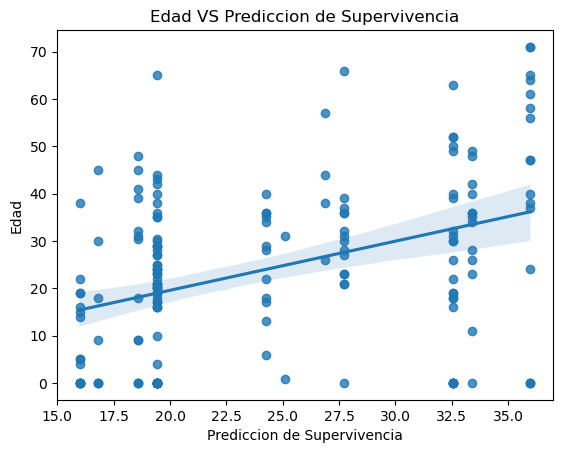

In [66]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Prediccion de Supervivencia")
plt.ylabel('Edad')
plt.title("Edad VS Prediccion de Supervivencia")
plt.show()